# TP Chaines de Markov

## 1- Génération d'une variable aléatoire discrète

### Exemple : 
On se place sur un espace fini, disons 
$$
E= \{ Rouge; Bleu; Vert\}
$$

On souhaite simuler une variable aléatoire de loi:
$$
\begin{array}{c|ccc}
X & Rouge & Bleu & Vert \\
\hline
\mathbb{P}(X=k) & \frac{1}{2} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

Pour cela, on se sert de la fonction Python
$$ np.random.uniform(0,1)
$$ ( non, il faut utiliser: np.rand.rand() )
qui génère une loi uniforme sur [0,1]

In [216]:
import numpy as np
import matplotlib.pyplot as plt

In [217]:
#Exemple 
x=np.random.rand()
if x <= 1/2 :
    print("Rouge");
elif x<= 5/6 :
    print("Bleu");
else: print("Vert");

Bleu


### Exercice 1:
- Expliquer pourquoi l'exemple précédent fonctionne.
- Ecrire une fonction qui prend en entrée un vecteur de probabilité et qui renvoie une réalisation de la variable aléatoire.

Réponse: cela evalue à Rouge si ```x <= 1/2``` à Beleu si ```1/2 < x <= 5/6``` qui équivaut à une probabilité de 1/3  et le reste a une proba de 1/6

0


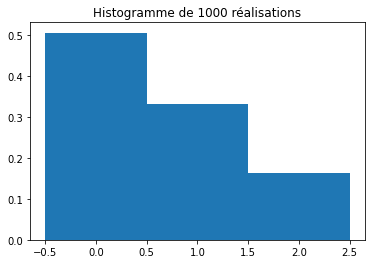

In [218]:
def real(P):
    p = np.random.rand()
    aux = 0
    for index, val in enumerate(P):
        if p <= val + aux:
            return index
        aux += val


P = [1/2, 1/3, 1/6]
print(real(P))
realisations = [real(P) for i in range(1000)]
bins = lambda u: np.arange(len(u) +1) - 0.5
plt.title('Histogramme de 1000 réalisations')
plt.hist(realisations, bins =  bins(P), density = True)
plt.show()

## 2- Application à la génération d'une chaine de Markov

### Exemple:

On considère la chaine de Markov sur $\{1,2,3\}$ de matrice de transition
$$P= \begin{pmatrix} 0 & 0.1 & 0.9 \\ 0.1 & 0 & 0.9 \\ 0.5 & 0.5 & 0 \end{pmatrix}$$

On rappelle que si $\mu_n$ désigne la loi de $X_n$, c'est à dire:
$$
\mu_n= 
\begin{pmatrix}\mathbb{P}(X_n=1)& \mathbb{P}(X_n=2)& \mathbb{P}(X_n=3)
\end{pmatrix}
$$


Alors, on a la relation:
$$
\mu_{n+1} = \mu_{n}P
$$

Prennons $X_0$ de loi 
$$
\mu_0 = \begin{pmatrix}
\frac{1}{2}& \frac{1}{3}& \frac{1}{6}
\end{pmatrix}
$$



In [219]:
# Simulation de 10 pas dans la chaine de Markov:

Mkv=[];


# Génération de X_0:
x=np.random.rand()
if x <= 0.5 :
    Mkv.append(0)
elif x<= 5/6 :
    Mkv.append(1)
else: Mkv.append(2)



# Matrice de transition:
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])
    

for i in range(10):
    # On sélectionne la ligne de P correspondant à l'état dans lequel est la chaine
    State = Mkv[-1]
    x = np.random.uniform(0,1)
    proba= P[State]

    # On tire un nouvel état pour la chaine.
    if x <= proba[0] :
        Mkv.append(0)
    elif x<= proba[0]+proba[1] :
        Mkv.append(1)
    else: Mkv.append(2)


print(Mkv)


[2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2]



### Exercice 2: 
S'approprier le code ci dessus. On pourra par exemple:
- Faire varier le nombre de pas dans la chaine de Markov
- Changer la matrice de transition et/ou la probabilité initiale
- Considérer un espace d'état différent
- etc.


### Exercice 3: 
Ecrire une fonction qui prend en paramètres:
- une loi initiale, 
- une matrice de transition,
- un entier $n$ 

et qui retoure $n$ pas de la chaine de Markov.

In [220]:
# P matrice de transition, n le nb de pas
def markov(loi, P, n):
    Mkv=[];

    # Génération de X_0:
    Mkv.append(real(loi))

    for i in range(n):
        # On sélectionne la ligne de P correspondant à l'état dans lequel est la chaine
        State = Mkv[-1]
        x = np.random.rand()
        proba= P[State]
        Mkv.append(real(proba))

    return Mkv


loi = [1/2, 1/3, 1/6]

# Matrice de transition:
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])
print(markov(loi, P, 10))

[0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1]


### Représentation et Visualisation

On peut chercher à représenter la trajectoire en fonction du nombre de pas:

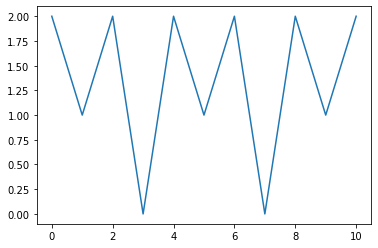

In [221]:
Niter=range(11)
plt.plot(Niter,Mkv)

On voit qu'en temps long, ce genre de graphique n'est pas très utile. 
À la place, on dessine un histogramme:

(array([2., 3., 6.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

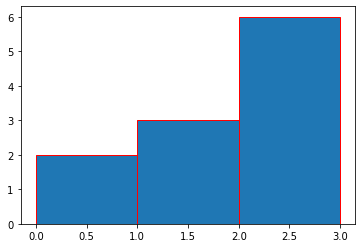

In [222]:
plt.hist(Mkv, range = (0, 3), bins = 3,edgecolor = 'red')

### Exercice 4:

Se servir du code écrit à l'exercice 3 pour simuler $N$ pas d'une chaine de Markov $(X_n)_{n \ge 0}$ et représenter l'histogramme obtenu pour différentes valeurs de $N$ 

On prendra différentes matrices de transitions et lois initiales donnant
- une chaine irréductible, récurrente et apériodique,
- une chaine avec plusieurs états transitoires,
- un chaine avec plusieurs classes récurrentes,

Pour chaque exemple, commenter le résultat obtenu.

### Exemple: 
La matrice de transition suivante donne une chaine de Markov avec deux classes récurrentes:
$$
P=
\begin{pmatrix}
1/2 & 1/2 & 0 & 0 &0 \\
1/2 & 1/2 & 0 & 0 &0 \\
0 & 0 & 1/2 & 1/3 &1/6 \\
0 & 0 & 1/5 & 0 &4/5 \\
0 & 0 & 1/3 & 1/3 &1/3 \\
\end{pmatrix}
$$

Dans cet exemple, les deux ensembles d'états $\{0,1\}$ et $\{2,3,4\}$ évoluent de façon complètement indépendante. 
Le comportement de la chaine est donc déterminé par le choix de $X_0$.

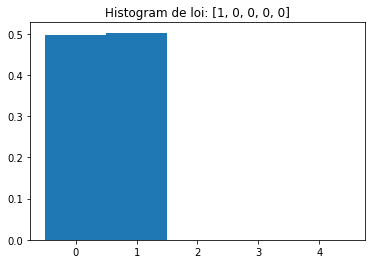

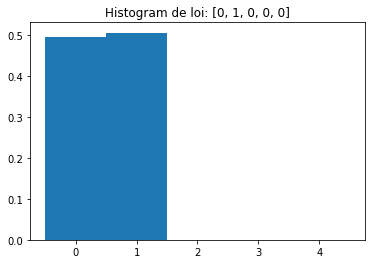

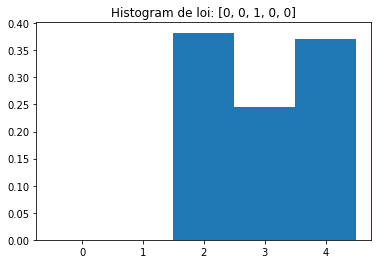

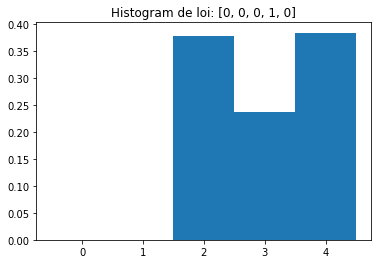

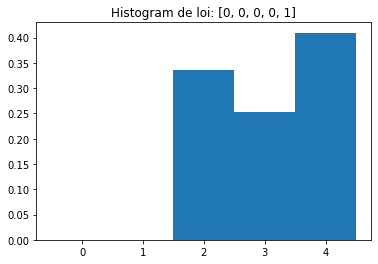

In [223]:
P = np.array([[1/2, 1/2, 0 , 0 ,0  ],
              [1/2, 1/2, 0 , 0 ,0  ],
              [0  ,   0,1/2,1/3,1/6],
              [0  ,   0,1/5, 0 ,4/5],
              [0  ,   0,1/3,1/3,1/3]])


for i in range(5):
    u = [0,0,0,0,0]
    u[i] = 1
    realisations = markov(u, P, 1000)
    plt.title(f"Histogram de loi: {u}")
    plt.hist(realisations, bins = bins(u), density = True)
    plt.show()


### 3- Convergence vers la probabilité invariante

Soit $(X_n)_{n \ge 0}$ une chaine de Markov irréductible, récurrente et apériodique sur $E$.
Alors, on sait que $\forall x,y \in E$, on a:
$$
\mathbb{P}_x(X_n=y) \underset{n \rightarrow  +\infty}\longrightarrow \pi(y)
$$
où $\pi$ est la probabilité invariante. 

Si on note $\mu_n$ le vecteur $\Big(\mathbb{P}_x(X_n=y), y \in E \Big)$, alors, la convergence précédente devient:
$$
\mu_n \underset{n \rightarrow  +\infty}\longrightarrow \pi
$$


On souhaite vérifier cela numériquement.

In [224]:
#Loi initiale: 
mu0=np.array([1, 0, 0])

# Matrice de transition
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])

# Calcul de la puissance de P
mu=mu0
for i in range(100):
    mu=np.dot(mu,P)

print(mu)

[0.26316419 0.26316419 0.47367163]


### Exercice 5: 

- Faire varier la puissance. Qu'observez vous?
- Représenter graphiquement cette convergence

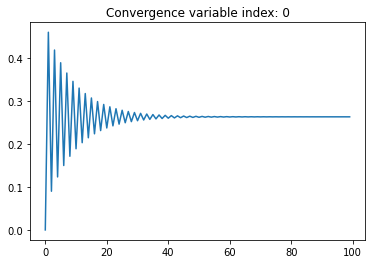

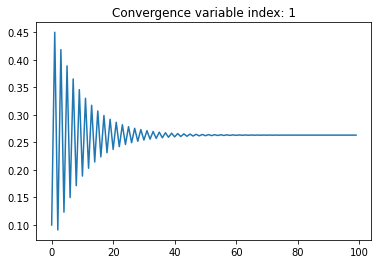

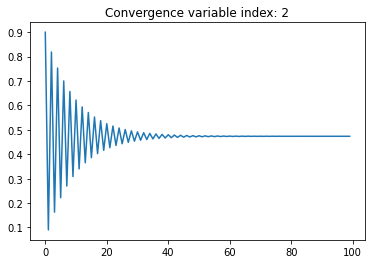

In [225]:
#Loi initiale:
mu0=np.array([1, 0, 0])

# Matrice de transition
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])


hist = []
# Calcul de la puissance de P
mu=mu0
iterations = 100
for n in range(iterations):
    for i in range(n):
        mu=np.dot(mu,P)
        hist.append(mu)

for i in range(len(mu0)):
    var = [hist[n][i] for n in range(iterations)]
    plt.title(f"Convergence variable index: {i}")
    plt.plot([i for i in range(iterations)], var)
    plt.show()


Pour éviter des calculs de puissance d'une grosse matrice, on pourrait laisser évoluer la chaine de Markov pendant un certain temps et *compter* la proportion du temps passé dans chaque état


In [226]:
# Simulation de 1000 pas dans la chaine de Markov:

Mkv=[];


# Génération de X_0:
x=np.random.uniform(0,1)
if x <= 0.5 :
    Mkv.append(0)
elif x<= 5/6 :
    Mkv.append(1)
else: Mkv.append(2)



# Matrice de transition:
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])
    

for i in range(1000):
    # On sélectionne la ligne de P correspondant à l'état dans lequel est la chaine
    State = Mkv[-1]
    x=np.random.uniform(0,1)
    proba= P[State]

    # On tire un nouvel état pour la chaine.
    if x <= proba[0] :
        Mkv.append(0)
    elif x<= proba[0]+proba[1] :
        Mkv.append(1)
    else: Mkv.append(2)

print('Temps passé en 0')
t0=0
for i in range(len(Mkv)):
    if Mkv[i]==0:
        t0=t0+1
print(t0/1000)

print('Temps passé en 1')
t1=0
for i in range(len(Mkv)):
    if Mkv[i]==1:
        t1=t1+1
print(t1/1000)

print('Temps passé en 2')
t2=0
for i in range(len(Mkv)):
    if Mkv[i]==2:
        t2=t2+1
print(t2/1000)


Temps passé en 0
0.27
Temps passé en 1
0.256
Temps passé en 2
0.475



### Exercice 6:
Ecrire un programme qui simule un nombre N de pas de d'une chaine de Markov et qui retourne la proportion du temps passé dans chaque état.

Ce porgramme doit prendre en paramètres
- la loi initiale,
- la matrice de transition
- le nombre de pas souhaité


In [227]:
def temps_par_etat(loi, P, n):
    Mkv = markov(loi, P, n)
    etats = [0]*len(loi)
    for i in Mkv:
        etats[i] += 1

    return etats

P = np.array([[1/2, 1/2, 0 , 0 ,0  ],
              [1/2, 1/2, 0 , 0 ,0  ],
              [0  ,   0,1/2,1/3,1/6],
              [0  ,   0,1/5, 0 ,4/5],
              [0  ,   0,1/3,1/3,1/3]])

for etat, temps in enumerate(temps_par_etat([1,0,0,0,0], P, 1000)):
    print(f"On a passé {temps} fois pas {etat}")

On a passé 492 fois pas 0
On a passé 509 fois pas 1
On a passé 0 fois pas 2
On a passé 0 fois pas 3
On a passé 0 fois pas 4


## 4- Application

France TV lance sa propre plate-forme de streaming qu'ils appellent "Salto".
Ils doivent se faire une place entre Netflix et Disney+ qui sont les plus gros intervenant du secteur.

On suppose que la distribution des parts de marché est comme suit:

$$
\begin{array}{c|cccc}
Service & Netflix & Disney+ & Salto & SansAbonnement \\
\hline
parts \  de \  marché & .55 & .2 & .1 & .15
\end{array}
$$

Disney+ s'inquettent alors de l'évolution du marché s'ils ne font rien.
Ils demandent une étude et les conclusions sont les suivantes:

$$
\begin{array}{c|cccc}
 & Netflix & Disney+ & Salto & SansAbonnement \\
 \hline 
Netflix& 0.9262 & 0.0385 & 0.01&  0.0253 \\
Disney+&0.01& 0.94& 0.01& 0.04\\
Salto&0.01& 0.03& 0.92& 0.04\\
SansAbonnement&0.035& 0.035& 0.035& 0.895              
\end{array}
$$

C'est à dire qu'un usager de Netflix a 92.62 \% de chances de continuer à rester sur Netflix dans la semaine, 3\% de chances de passer chez Disney+, 1\% de chance de passer chez Salto etc.



### Exercice 7:

Etudiez numériquement cette chaine de Markov. On pourra par exemple:

- Calculer les puissances sucessives de la matrice de transition et trouver la distribution stationnaire

- Simuler l'effet d'une, deux, trois etc semaine(s) de pub
- Représenter la convergence de la chaine.

- Voir que les deux méthodes donnent le même résultat.

mu final: [0.19573669 0.36604848 0.18220086 0.25601397]


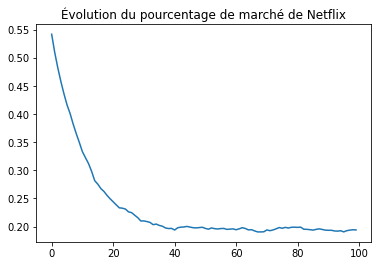

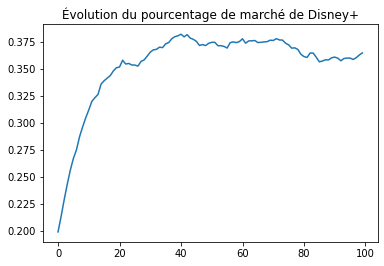

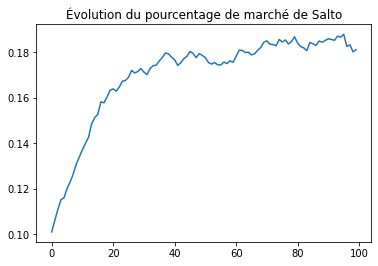

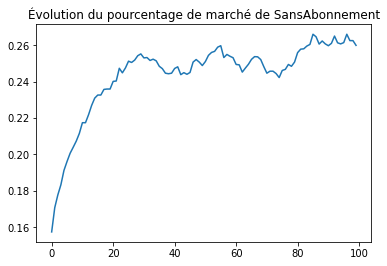

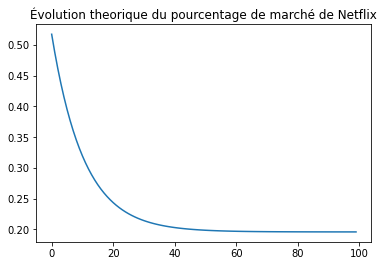

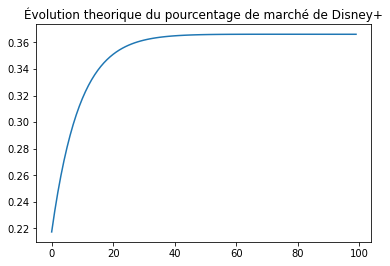

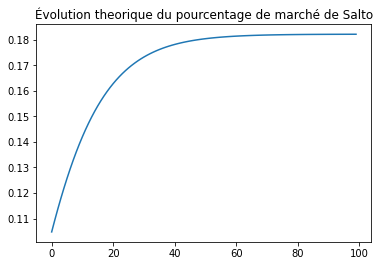

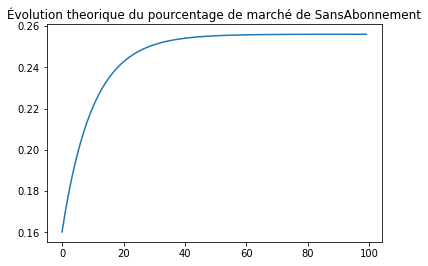

In [236]:
# Puissances:
#Loi initiale:
mu0=np.array([0.55, 0.2, 0.1, 0.15])
services = ["Netflix", "Disney+", "Salto", "SansAbonnement"]
# Matrice de transition
P = np.array([[0.9262, 0.0385, 0.0100, 0.0253],
              [0.0100, 0.9400, 0.0100, 0.0400],
              [0.0100, 0.0300, 0.9200, 0.0400],
              [0.0350, 0.0350, 0.0350, 0.8950]])

# Calcul de la puissance de P
hist = []
mu=mu0
for i in range(100):
    mu=np.dot(mu,P)

print(f"mu final: {mu}")

# Pub: si on fait de la pub
# test avec des utilisateurs "reels"
def simulate(mu0, P, nb):
    nb_utilisateurs = nb
    utilisateurs = [real(mu0) for _ in range(nb_utilisateurs)]
    for w in range(100): #100 days
        day = [0]*len(mu0)
        for index, u in enumerate(utilisateurs):
            day[u] += 1
            utilisateurs[index] = real(P[u])
        hist.append([day[i]/float(nb_utilisateurs) for i in range(len(mu0))])

    for i in range(len(mu0)):
        var = [hist[n][i] for n in range(iterations)]
        plt.title(f"Évolution du pourcentage de marché de {services[i]}")
        plt.plot([i for i in range(iterations)], var)
        plt.show()

simulate(mu0, P, 10000)
# Calcul de la convergence
hist = []
mu=mu0
iterations = 100
for n in range(iterations):
    for i in range(n):
        mu=np.dot(mu,P)
        hist.append(mu)

for i in range(len(mu0)):
    var = [hist[n][i] for n in range(iterations)]
    plt.title(f"Évolution theorique du pourcentage de marché de {services[i]}")
    plt.plot([i for i in range(iterations)], var)
    plt.show()



## 5- Cas d'une chaine de Markov sur un espace infini.

Dans cette dernère partie, on s'intéresse à une chaine de Markov sur un espace d'état infini. 

### Exercice 8: 
Simuler la marche aléatoire sur $\mathbb{Z}$ à l'aide d'une suite de Rademacher:
$$
\mathbb{P}(X_n= 1)=p = 1-\mathbb{P}(X_n= -1).
$$

- Comparer les comportements de la chaine pour $p<1/2$, $p>1/2$ et $p=1/2$.
- Représenter graphiquement ces 3 cas.



![markov graph](https://joelimgu.github.io/assets/images/hosted_for_external_use/marche_Tp_markov_.png)

In [238]:
p = 1/2
P = np.array([[0,p],
              [p,0]])


### Modèle de Stock 

On considère l'exemple de l'exercice 6 de la feuille de TD 2. 
On pourra utiliser sans preuve les résultats de cet exercice.

On note $X_n$ l'état d'un stock de pièces détachées à l'instant $n$, $D_{n+1}$ la demande (aléatoire) formulée par des clients, et on suppose qu'une seule pièce détachée est fabriquée entre les instants $n$ et $n+1$.

L'état du stock à l'instant $n+1$ est alors
$$X_{n+1} = \max(X_n + 1 - D_{n+1},0).$$


On suppose que $X_0 = 0$ (le stock est initialement vide) et que $(D_n)_{n \geq 1}$ est une suite de v.a. indépendantes et de même loi que $D$, une v.a. à valeurs dans $\{0,1,2\}$:

$$
\begin{array}{c|ccc}
D & 0 & 1 & 2 \\
\hline
\mathbb{P}(D=k) & p_0 & p_1 & p_2
\end{array}
$$

On suppose que les trois probabilités $p_0,p_1,p_2$ sont strictement positives, et $p_2 \ge p_1$.


### Exercice 9:

- Simuler cette chaine de Markov pour différentes valeures de $p_0,p_1,p_2$.
- Etudier le cas $p_0=p_2$. 
- En question 8 de l'exercice 6, on montre que si $p_0 < p_2$,
$$
\mu(k) = \left(\frac{p_0}{p_2}\right)^k
$$
est une probabilité invariante pour la chaine. Représenter graphiquement cette convergence.


- On définit la variable aléatoire: 
$$
T= \inf\{n \ge 1; X_n=0 \}.
$$
Que représente $T$?

- Simuler une réalisation de T

- Pour chaque valeures de $p_0,p_1,p_2$, calculer numériquement $\mathbb{E}(T)$. 


### Indication:
On pourra s'aider du code suivant

In [229]:
# On fixe des valeurs pour p_0, p_1, p_2

# Génération de D:
def Dem(p0,p1,p2):
#    if p0+p1+p2 != 1: print("Pas une proba")
#    else:
        x=np.random.uniform(0,1)
        if x <= p0 :
            D=0
        elif x<= p0+p1 :
            D=1
        else: D=2
        return D

# def partie positive
def PosPart(x):
    if x >= 0: return x
    else: return 0
    
# Calcul n pas dans X


def Stock_markov(n):
    #p0=1/2; p1=1/3; p2=1/6
    #p0=1/5; p1=2/5; p2=2/5
    p0=2/5; p1=1/5; p2=2/5
    X=[0]
    k=0
    while k < n:
        Demande=Dem(p0,p1,p2)
        Xnew=PosPart(X[-1]+1-Demande)
        X=np.concatenate((X,[Xnew]))
        k=k+1
    return X
    
# Modif de la fonction précédente poour calculer la longeur de l'excursion

def Excursion_Stock():
    #p0=1/2; p1=1/3; p2=1/6
    p0=1/5; p1=2/5; p2=2/5
    #p0=2/5; p1=1/5; p2=2/5

    k=0
    Tlong=0
    Demande=Dem(p0,p1,p2)
    Xnew=PosPart(0+1-Demande)
    X=[Xnew]
    while Xnew != 0:
        Demande=Dem(p0,p1,p2)
        Xnew=PosPart(X[-1]+1-Demande)
        if Xnew != 0:
            Tlong=Tlong+1
        X=np.concatenate((X,[Xnew]))
        k=k+1
    return Tlong





In [230]:
X=Stock_markov(100)

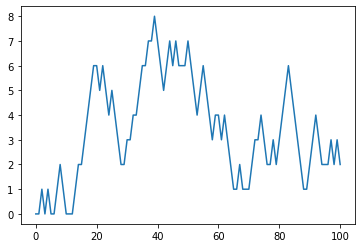

In [231]:
plt.plot(range(101),X)

In [232]:
T=0
for i in range(1000):
    T=T+Excursion_Stock()
print(T/1000)

0.747
